# XGBoost Model

#### What is XGBoost?

XGBoost (Extreme Gradient Boosting) is a popular gradient boosting framework that is designed to optimize performance and speed in tree ensemble learning algorithms. It uses a combination of gradient boosting and regularization techniques to prevent overfitting and improve model accuracy. XGBoost has become a popular choice for machine learning competitions and is widely used in industry for its performance and scalability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import shap

In [2]:
data = pd.read_csv('cleanedLovooData.csv')
data

,Unnamed: 0,gender,genderLooking,age,name,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,isInfluencer,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,userId
0,0,F,M,25,daeni,4,8279,239,0,3,...,0,0,0,0,1,0,1,2015-04-25T20:43:26Z,1.429995e+09,4e3842f79b70e7ea57000064
1,1,F,M,22,italiana 92,5,663,13,0,0,...,0,0,0,0,3,0,1,2015-04-26T09:19:35Z,1.430040e+09,4e3d34bf5d2bce7b160006a3
2,2,F,M,21,Lauraaa,4,1369,88,0,2,...,0,0,1,0,0,0,1,2015-04-06T14:24:07Z,1.428330e+09,4ec96c090dc82cb25d00000a
3,3,F,none,20,Qqkwmdowlo,3,22187,1015,2,3,...,0,0,0,0,2,0,1,2015-04-07T11:21:01Z,1.428406e+09,4eef8b81ebf2c8f64000000c
4,4,F,M,21,schaessie {3,12,35262,1413,9,12,...,0,0,1,0,1,0,1,2015-04-06T14:25:20Z,1.428330e+09,4ef3cc5aa9d0b3d07d000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,3987,F,M,22,Ser**a,6,1003,98,0,0,...,0,0,0,0,1,0,1,2015-04-05T07:13:49Z,1.428218e+09,CRYu9vQnJ8lHU2pVpimKJGIyTHqR73rAu8hg21rtn340Ys...
3988,3988,F,M,24,Mon**a,7,6890,563,0,0,...,0,0,1,0,1,1,1,2015-04-19T11:00:59Z,1.429441e+09,CRYuikFTcdFDsGDJugu3PyvSonM1LYwyviJXvZBUayBMgI...
3989,3989,F,M,20,Fa**y,4,1157,52,1,0,...,0,0,0,0,1,0,1,2015-04-19T08:37:52Z,1.429433e+09,CRYv9Qg5MTSHaqrTK2CMe9cPRNACAFdYDi7BEgoQTyljzz...
3990,3990,F,M,20,Fa**y,4,1157,52,1,0,...,0,0,0,0,1,0,1,2015-04-19T08:37:52Z,1.429433e+09,CRYwD9ZmbjDXJu8li2DPXI0UseBJt2lovQBWnbKcGDVVcs...


#### Now, we want to drop features that are not relevant or hard to quantify, such as names and also want to convert booleans to 1 and 0 so we can use the regressor model 

In [3]:
data = data.select_dtypes(exclude=['object'])
data['flirtInterests_chat'] = data['flirtInterests_chat'].astype(int)
data['flirtInterests_friends'] = data['flirtInterests_friends'].astype(int)
data['flirtInterests_date'] = data['flirtInterests_date'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3992 non-null   int64  
 1   age                     3992 non-null   int64  
 2   counts_pictures         3992 non-null   int64  
 3   counts_profileVisits    3992 non-null   int64  
 4   counts_kisses           3992 non-null   int64  
 5   counts_fans             3992 non-null   int64  
 6   counts_g                3992 non-null   int64  
 7   flirtInterests_chat     3992 non-null   int32  
 8   flirtInterests_friends  3992 non-null   int32  
 9   flirtInterests_date     3992 non-null   int32  
 10  distance                3992 non-null   float64
 11  isFlirtstar             3992 non-null   int64  
 12  isHighlighted           3992 non-null   int64  
 13  isInfluencer            3992 non-null   int64  
 14  isNew                   3992 non-null   

#### Now we can get our variables for x


In [4]:
data2 = data
data2 = data2.drop(columns=['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans', 'counts_g', 'lastOnlineTime', 'Unnamed: 0'])
x = data2

## Predicting number of likes

In Lovoo, the number of likes is also known as the count_kisses, so we will be predicting that first

In [5]:
y = data.counts_kisses
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2023)
XGBModel = XGBRegressor()
XGBModel.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [6]:
y_pred = XGBModel.predict(x_test)
maeKisses = str(mean_absolute_error(y_pred, y_test))
mseKisses = str(mean_squared_error(y_pred, y_test))
stdKisses = str(np.std(y_test - y_pred))
print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_test)))
print("Mean Squared Error: " + str(mean_squared_error(y_pred, y_test)))
print("stddev:" + str(np.std(y_test - y_pred)))

Mean Absolute Error: 189.5173082187854
Mean Squared Error: 169534.81898062336
stddev:410.61548051532503


# Features with the Highest Weightage

## using SHAP

<br />

### What is SHAP?

<br />
SHAP can provide a global view of the model's feature importance by calculating the contribution of each feature to the model's output for all data points. This helps to identify the most important features in the model, and how they contribute to the model's predictions. Since we have many features, SHAP will help in determining which feature has the highest weightage and also whether there is a pattern with other features by creating a 3 dimensional graph.

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


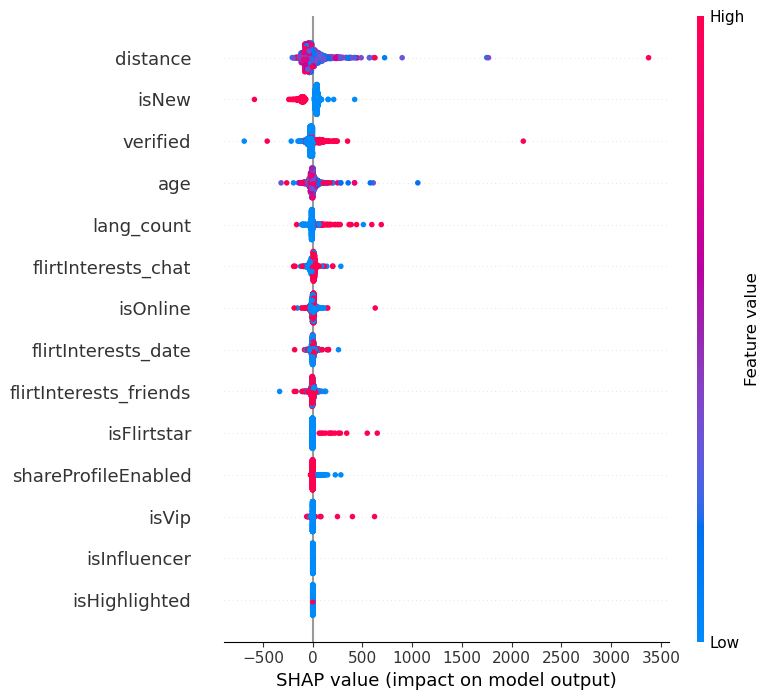

In [7]:
explainer = shap.TreeExplainer(XGBModel)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

<br /><br />

#### A brief summary of the features

distance - how far the person is from the profile<br />
isNew - new to Lovoo<br />
verified - whether the person has been verified<br />
age - age<br />
lang_count - number of languages known<br />
flirtInterests_chat - whether the user indicated being in search for people to chat with<br />
isOnline - is currently online<br />
flirtInterests_date - Whether the user indicated being open to dating people.<br />
flirtInterests_friends - Whether the user indicated being open to making friends.<br />
isFlirtstar - Whether the user account that fetched the dataset "liked" this user's profile.<br />
shareProfileEnabled - allows her profile to be shared<br />
isVIP - if the user is VIP. <br />
isInfluencer - whether this is an influencer account<br />
isHighlighted - Whether the user's profile is currently highlighted (at fetch time). [A user can use in-app currency to have one's profile temporarily highlighted and get more impressions/matches]<br />

<br /> <br /> 
## Explanation 
<br />

#### From the looks of it, it's pretty clear that isHighlighted has little to no effect on the number of likes one receives, which is quite surprising. Having checked the data, it's not because there are no highlighted profiles, it just doesn't have any effect. Other features are pretty clear cut, such as:
<br />

isNew - Experienced people get more likes<br />
verified - verified people also get more likes<br />
lang_count - it seems to be that people who know more languages get more likes as well<br />


## Let's take a closer look at distance and age:
<br />

### Distance

Below, we check if there are any correlations with distance and the next closest feature that may produce a pattern using shap

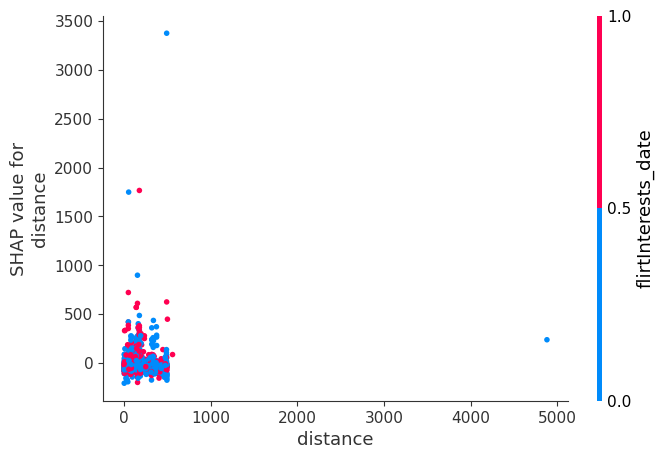

In [8]:
distancePlot = shap.dependence_plot("distance", shap_values, x_test)

Shap has concluded that the next feature that would produce a pattern is flirtInterest_data. However, looks like there are a few anomalies. Let's try to remove them to see if there's a pattern we can observe in 'distance'

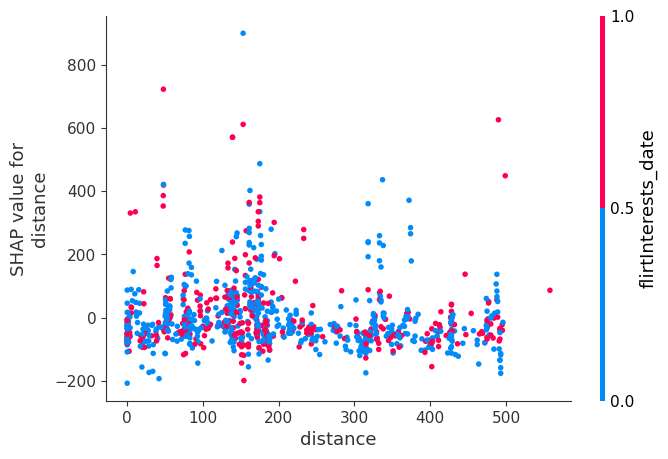

In [9]:
mask = (x_test['distance'] < 2000) & (shap_values < 1500).all(axis=1)
filtered_shap_values = shap_values[mask]
filtered_x_test = x_test[mask]
shap.dependence_plot("distance", filtered_shap_values, filtered_x_test)

Looks like there's not much correlation with distance and the number of likes

### Age

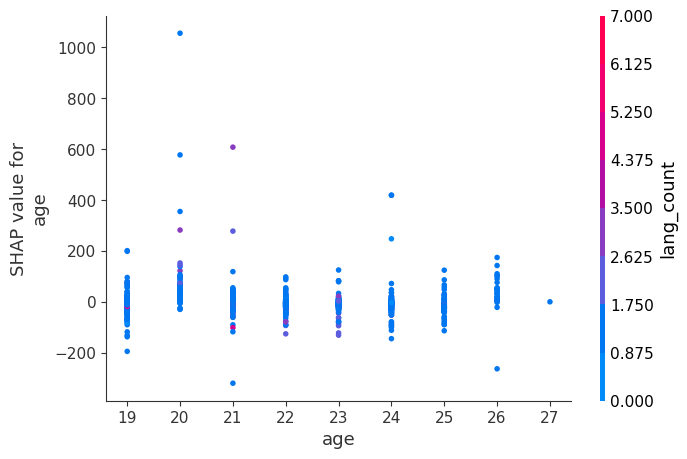

In [10]:
agePlot = shap.dependence_plot("age", shap_values, x_test)

Seems like there's not much either with age

# Predicting Profile Visits

Mean Absolute Error: 3764.528415872482
Mean Squared Error: 50282342.42766289
stddev:7073.052621214846


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


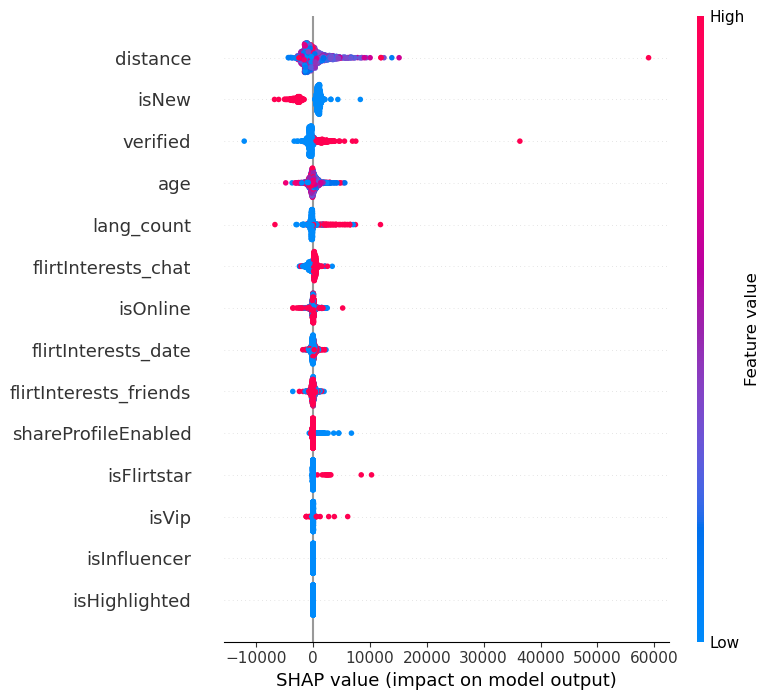

In [11]:
y = data.counts_profileVisits
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2023)
XGBModel = XGBRegressor()
XGBModel.fit(x_train, y_train)
y_pred = XGBModel.predict(x_test)
maeViews = str(mean_absolute_error(y_pred, y_test))
mseViews = str(mean_squared_error(y_pred, y_test))
stdViews = str(np.std(y_test - y_pred))
print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_test)))
print("Mean Squared Error: " + str(mean_squared_error(y_pred, y_test)))
print("stddev:" + str(np.std(y_test - y_pred)))
explainer = shap.TreeExplainer(XGBModel)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

#### Looks like it's pretty similar to counts_kisses. Just in case, let's double check flirtInterests_chat

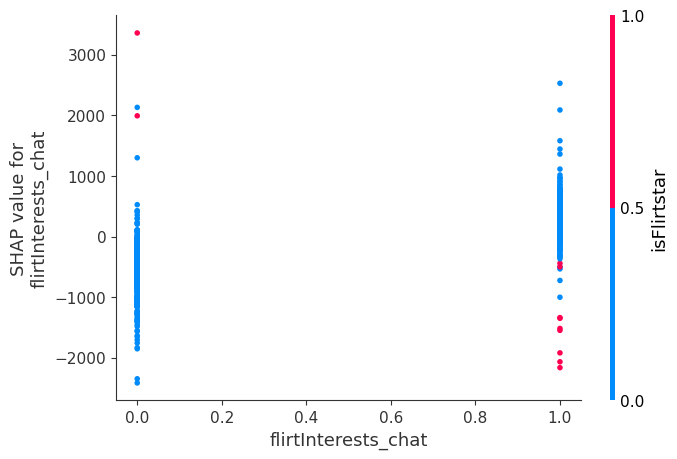

In [12]:
flirtInterestPlot = shap.dependence_plot("flirtInterests_chat", shap_values, x_test)

Seems like there might be a pattern. A person who is open to chatting has a better chance of getting views if the person who visited his/her profile is not a Flirtstar, ie, a person who both visited and liked the profile, and vice versa. 

In short, if someone is open to chatting, they are less likely to receive views from someone they liked previously, which is quite sad.

# Model Performance

For predicting the number of likes, we have:

In [13]:
print("Mean Absolute Error: " + maeKisses)
print("Mean Squared Error: " + mseKisses)
print("stddev:" + stdKisses)

Mean Absolute Error: 189.5173082187854
Mean Squared Error: 169534.81898062336
stddev:410.61548051532503


For predicting the number of views, we have:

In [14]:
print("Mean Absolute Error: " + maeViews)
print("Mean Squared Error: " + mseViews)
print("stddev:" + stdViews)

Mean Absolute Error: 3764.528415872482
Mean Squared Error: 50282342.42766289
stddev:7073.052621214846


#### Looks like XGboost works well to predict the number of kisses, but not the number of likes.